# Pós-Graduação - Ciência de Dados & Big Data

## Pontifícia Universidade Católica de Minas Gerais (PUC-MG

### Aluno: Victor Hugo Negrisoli

### Árvores de Decisão

Importando os dados necessários

In [100]:
import numpy as np
import pandas as pd

from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder

from IPython.display import SVG, display
import svgutils.transform as sg

In [99]:
dados = pd.read_excel('dados/sonar.xlsx', sheet_name=0)
dados.head()

,Atributo_1,Atributo_2,Atributo_3,Atributo_4,Atributo_5,Atributo_6,Atributo_7,Atributo_8,Atributo_9,Atributo_10,...,Atributo_52,Atributo_53,Atributo_54,Atributo_55,Atributo_56,Atributo_57,Atributo_58,Atributo_59,Atributo_60,Classe
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rocha
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rocha
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rocha
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rocha
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rocha


Analisando o dataset

In [28]:
dados.describe()

,Atributo_1,Atributo_2,Atributo_3,Atributo_4,Atributo_5,Atributo_6,Atributo_7,Atributo_8,Atributo_9,Atributo_10,...,Atributo_51,Atributo_52,Atributo_53,Atributo_54,Atributo_55,Atributo_56,Atributo_57,Atributo_58,Atributo_59,Atributo_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [29]:
dados.shape

(208, 61)

In [37]:
# Pegar todas as linhas (:), e todas as colunas (shape[1]) menos a última (-1)

X = dados.iloc[:, 0:(dados.shape[1] - 1)]
X.head()

,Atributo_1,Atributo_2,Atributo_3,Atributo_4,Atributo_5,Atributo_6,Atributo_7,Atributo_8,Atributo_9,Atributo_10,...,Atributo_51,Atributo_52,Atributo_53,Atributo_54,Atributo_55,Atributo_56,Atributo_57,Atributo_58,Atributo_59,Atributo_60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [41]:
dados_particionados = dados.iloc[:, (dados.shape[1] - 1)]

labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(dados_particionados)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Passos para indução do problema:

* Definir as bases X e y para treinamento e teste
* Instanciar o modelo DecisionTreeClassifier()
* Treinar o modelo com o método fit()
* Testar o modelo com o método predict()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1)

arvore_decisao = DecisionTreeClassifier(random_state=0, criterion='entropy')

arvore_decisao = arvore_decisao.fit(X_train, y_train)

y_pred = arvore_decisao.predict(X_test)

Acurácia da base de teste

In [59]:
acuracia = arvore_decisao.score(X_train, y_train)
acuracia

1.0

Acurácia da previsão

In [58]:
accuracy_score(y_test, y_pred)

0.7142857142857143

Relatório de classificação

In [61]:
print(classification_report(y_test, y_pred, target_names=["Mina", "Rocha"]))

              precision    recall  f1-score   support

        Mina       0.60      0.75      0.67         8
       Rocha       0.82      0.69      0.75        13

    accuracy                           0.71        21
   macro avg       0.71      0.72      0.71        21
weighted avg       0.74      0.71      0.72        21



Matriz de Confusão

In [70]:
matriz_confusao = confusion_matrix(y_test, y_pred)

In [73]:
matriz_confusao_df = pd.DataFrame(
    data=matriz_confusao,
    index=["Mina", "Rocha"],
    columns=["Mina (prev)", "Rocha (prev)"])

matriz_confusao_df.head()

,Mina (prev),Rocha (prev)
Mina,6,2
Rocha,4,9


In [97]:
viz = dtreeviz(arvore_decisao,
              X_train,
              y_train,
              target_name="Classe",
              feature_names=np.arange(0,60),
              class_names=["mina", "rocha"])  

viz.view()

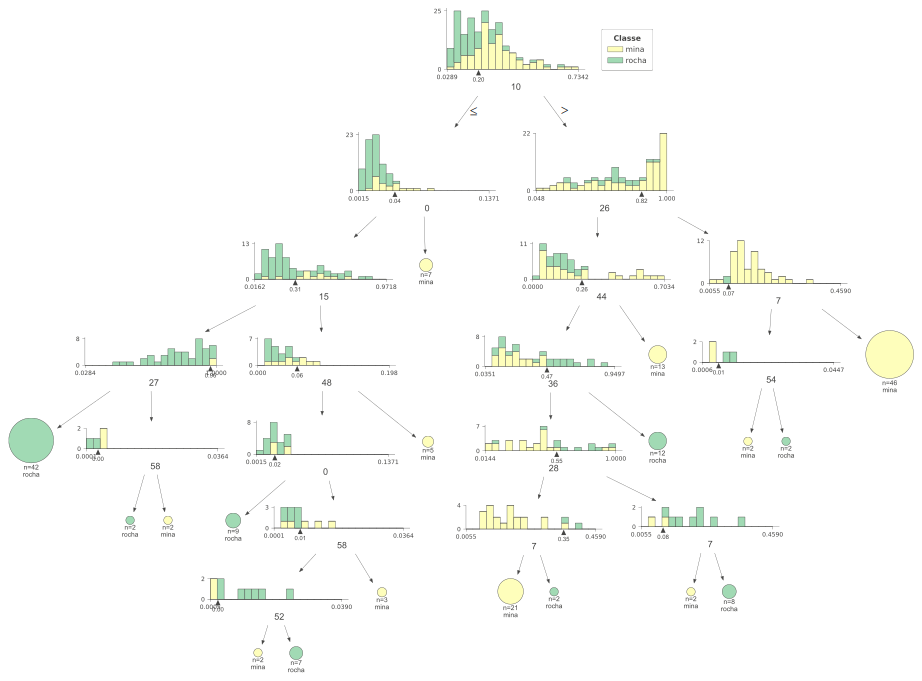

In [101]:
sg.SVGFigure("18cm", "12cm")
display(SVG(filename='DTreeViz - Sonar.svg'))